In [289]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [290]:
# Function to create scrollable table within a small window
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [291]:
import pandas as pd
pd.set_option('display.max_rows', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
import plotly.graph_objects as go
import plotly.express as px

# Basic Data Exploration

1. Loading Data (Coffee Production, Domestic Consumption, Export, Import)
2. Inspecting Data
3. Defining Questions/Hypotheses
4. Handling Missing Data
5. Data Cleaning
6. Visualizing Data
7. Grouping and Aggregating Data
8. Outliers Detection
9. Hypotheses testing

In [292]:
# import data
# unit of all numeric values is kilogramm (kg)

production = pd.read_csv('Coffee_production.csv', delimiter=',')
dom_cons = pd.read_csv('Coffee_domestic_consumption.csv', delimiter=',')
export = pd.read_csv('Coffee_export.csv', delimiter=',')
imports = pd.read_csv('Coffee_import.csv', delimiter=',')
imp_cons = pd.read_csv('Coffee_importers_consumption.csv', delimiter=',')

# Coffee Production

In [293]:
production.head()

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_production
0,Angola,Robusta/Arabica,3.000000e+06,4.740000e+06,4.680000e+06,1.980000e+06,4.620000e+06,3.720000e+06,4.260000e+06,3.840000e+06,...,1.740000e+06,1.980000e+06,2.100000e+06,2.340000e+06,2.460000e+06,2.700000e+06,2.100000e+06,2.520000e+06,3.120000e+06,8.208000e+07
1,Bolivia (Plurinational State of),Arabica,7.380000e+06,6.240000e+06,7.200000e+06,3.060000e+06,7.020000e+06,8.520000e+06,7.500000e+06,8.460000e+06,...,7.920000e+06,6.300000e+06,7.200000e+06,6.000000e+06,5.040000e+06,4.680000e+06,5.040000e+06,4.980000e+06,4.860000e+06,2.070000e+08
2,Brazil,Arabica/Robusta,1.637160e+09,1.637580e+09,2.076180e+09,1.690020e+09,1.691520e+09,1.083600e+09,1.751820e+09,1.568880e+09,...,2.915520e+09,3.325080e+09,3.281340e+09,3.198300e+09,3.172260e+09,3.407280e+09,3.164400e+09,3.907860e+09,3.492660e+09,7.508298e+10
3,Burundi,Arabica/Robusta,2.922000e+07,4.002000e+07,3.720000e+07,2.358000e+07,3.984000e+07,2.604000e+07,2.406000e+07,1.500000e+07,...,1.224000e+07,2.436000e+07,9.780000e+06,1.488000e+07,1.614000e+07,1.176000e+07,1.212000e+07,1.224000e+07,1.632000e+07,6.236400e+08
4,Ecuador,Arabica/Robusta,9.024000e+07,1.274400e+08,7.110000e+07,1.241400e+08,1.425600e+08,1.132800e+08,1.195800e+08,7.146000e+07,...,4.950000e+07,4.968000e+07,3.996000e+07,3.864000e+07,3.864000e+07,3.870000e+07,3.744000e+07,2.976000e+07,3.354000e+07,1.900380e+09


In [294]:
# Summary statistics
numerical_features = production.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
html_numerical = create_scrollable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
1990/91,55.0,1.017055e+08,2.510875e+08,0.0,2430000.0,27660000.0,9.216000e+07,1.637160e+09
1991/92,55.0,1.104753e+08,2.668466e+08,0.0,3900000.0,27780000.0,9.720000e+07,1.637580e+09
1992/93,55.0,1.074775e+08,3.022180e+08,0.0,2640000.0,30000000.0,9.234000e+07,2.076180e+09
1993/94,55.0,1.001007e+08,2.489344e+08,0.0,2130000.0,26520000.0,9.486000e+07,1.690020e+09
1994/95,55.0,1.017971e+08,2.510328e+08,0.0,2610000.0,24360000.0,1.153200e+08,1.691520e+09
1995/96,55.0,9.525927e+07,1.858680e+08,0.0,2610000.0,26040000.0,1.127700e+08,1.083600e+09
1996/97,55.0,1.127029e+08,2.602192e+08,0.0,2340000.0,24060000.0,1.139700e+08,1.751820e+09
1997/98,55.0,1.089676e+08,2.430145e+08,0.0,2880000.0,18000000.0,9.669000e+07,1.568880e+09
1998/99,55.0,1.187629e+08,3.142337e+08,0.0,3480000.0,26340000.0,1.076700e+08,2.205660e+09
1999/00,55.0,1.433280e+08,4.012591e+08,0.0,3540000.0,21840000.0,1.211700e+08,2.854680e+09


In [295]:
# find countries with highest Total Production (1990-2020)
top_production = production[['Country', 'Total_production']].sort_values(by=['Total_production'], ascending=False).head(10)
top_production.head(10)

,Country,Total_production
2,Brazil,7.508298e+10
53,Viet Nam,2.880318e+10
23,Colombia,2.159862e+10
5,Indonesia,1.540488e+10
29,Ethiopia,8.669520e+09
36,India,8.222220e+09
41,Mexico,7.853520e+09
32,Guatemala,7.020540e+09
35,Honduras,6.672720e+09
51,Uganda,5.919480e+09


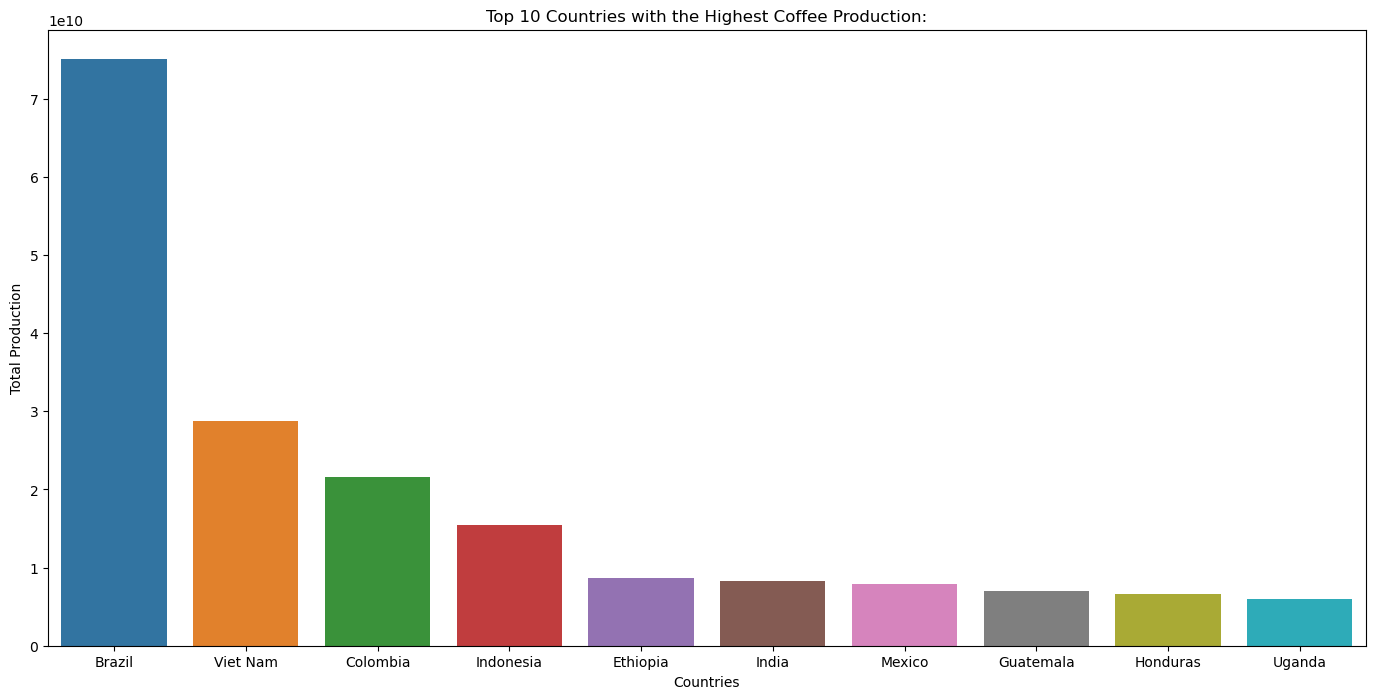

In [296]:
plt.figure(figsize=(17, 8)) # You can adjust the size to your preference
sns.barplot(x='Country', y='Total_production', data=top_production)

plt.title('Top 10 Countries with the Highest Coffee Production:')
plt.xlabel('Countries')
plt.ylabel('Total Production')

plt.show()

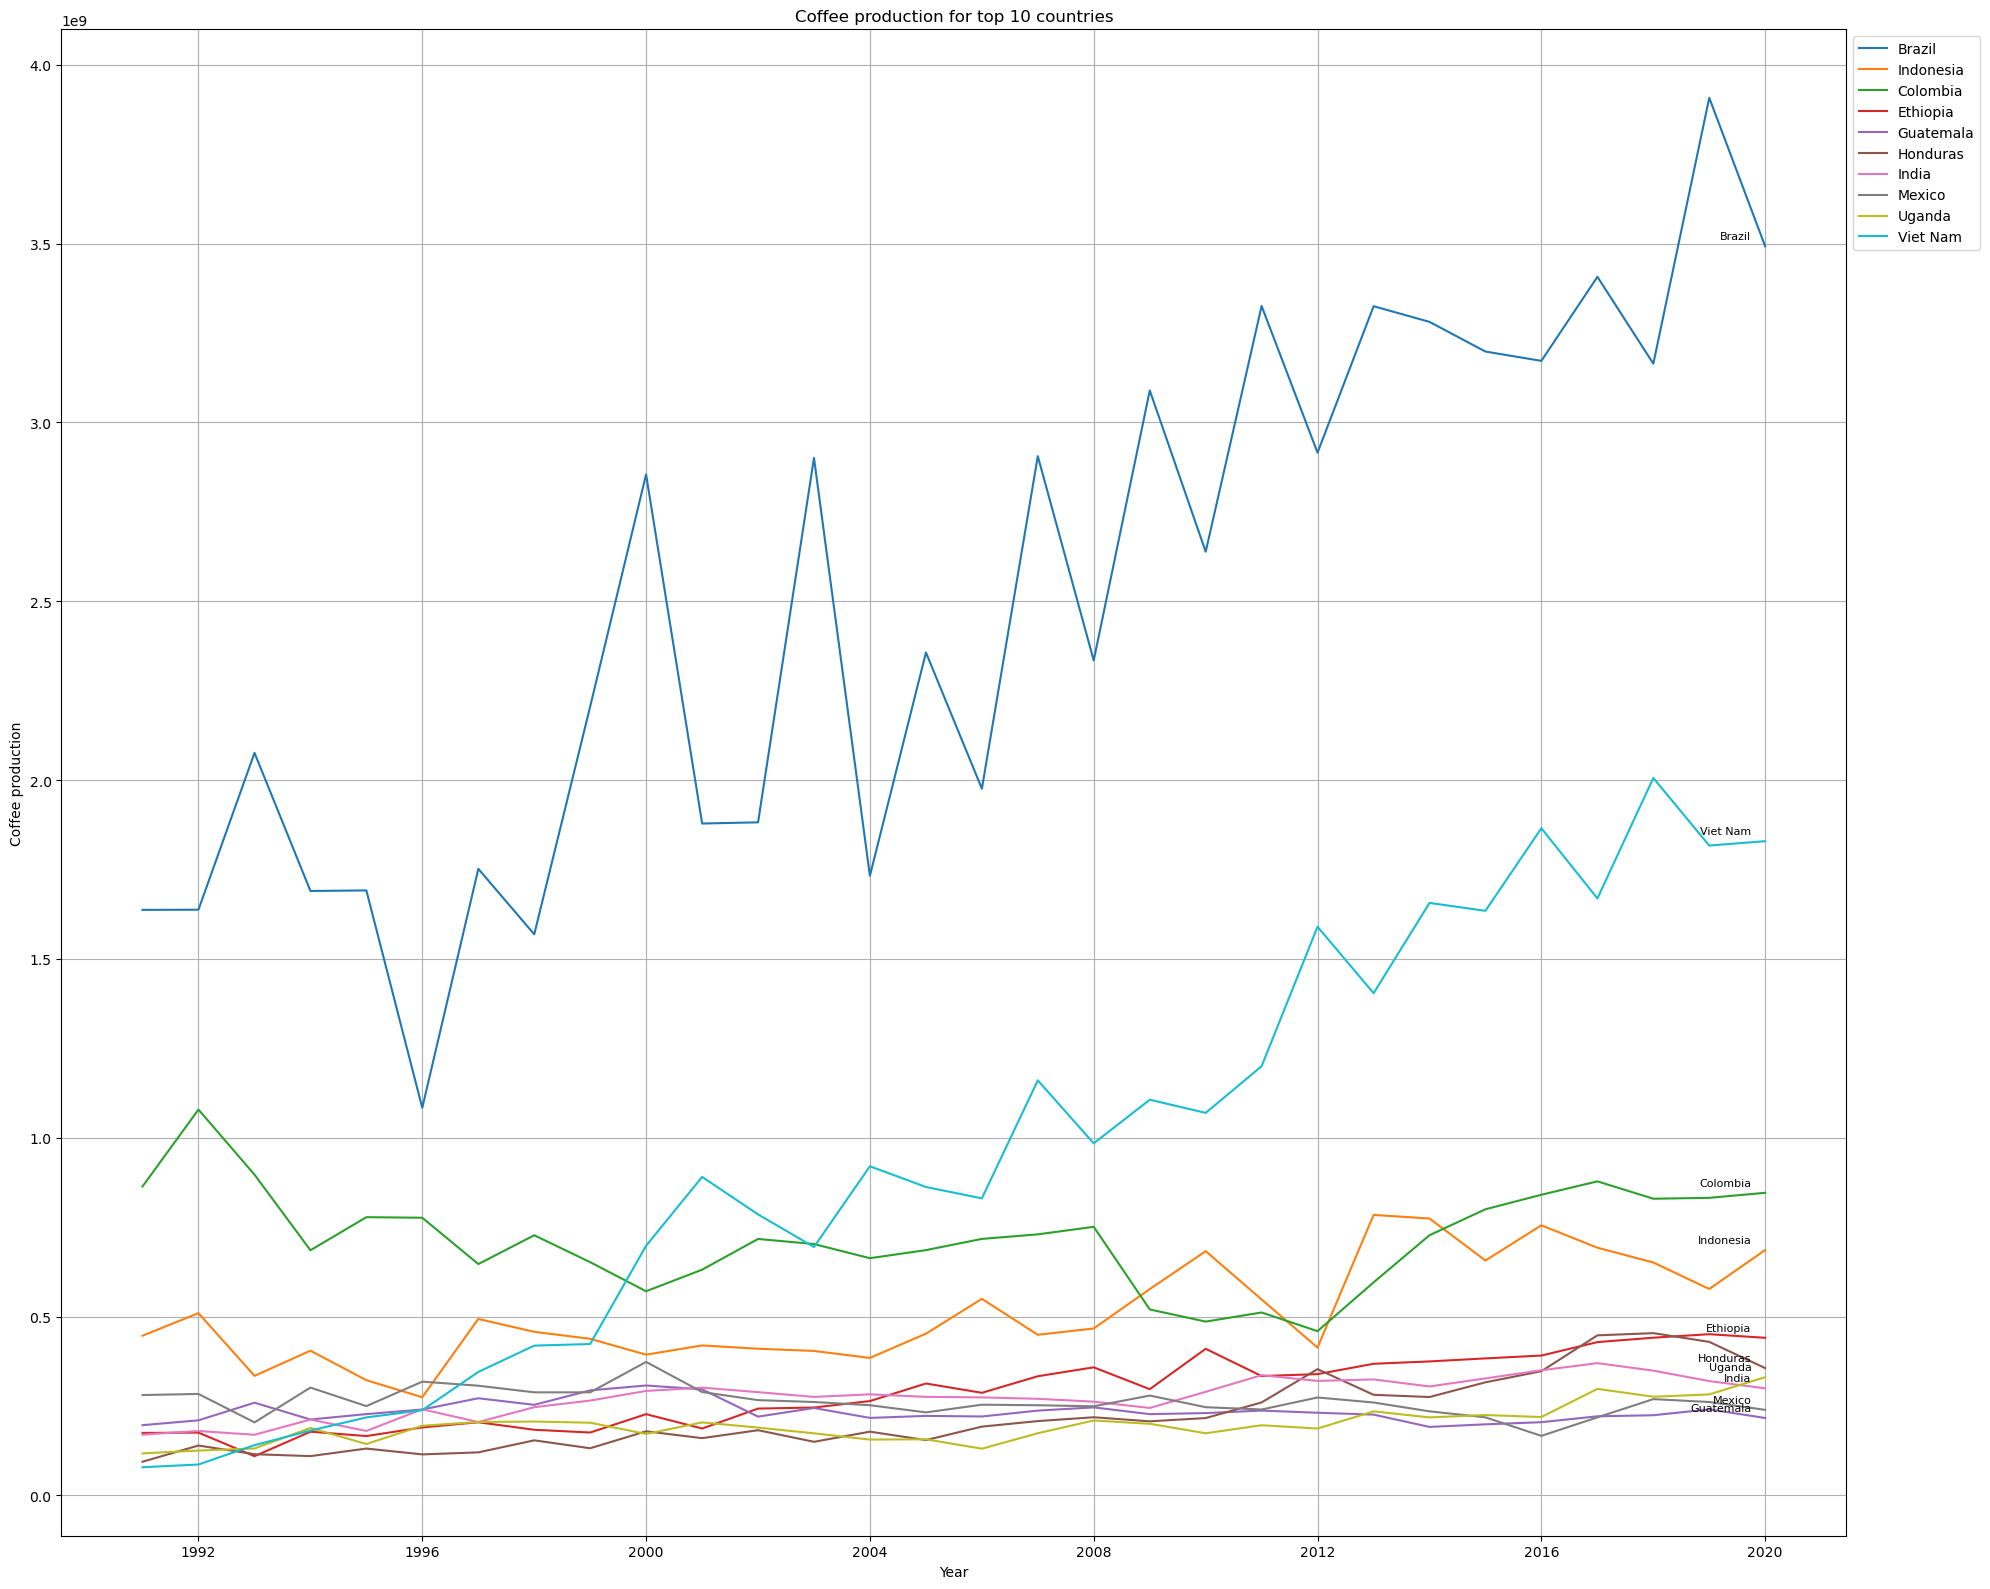

In [297]:
# Melt the DataFrame to convert years into a single 'Year' column
df_melted = pd.melt(production.iloc[:,:-1], id_vars=['Country', 'Coffee type'], var_name='Year', value_name='Production')

# Convert the 'Year' column to datetime
df_melted['Year'] = pd.to_datetime(df_melted['Year'], format='%Y/%y')

# calculate the total production for each country
total_production = df_melted.groupby('Country')['Production'].sum().reset_index()

# top 10 countries by total production
top_10_countries = total_production.nlargest(10, 'Production')['Country']

# subset the df_melted DataFrame to include only the top 10 countries
df_melted_top_10 = df_melted[df_melted['Country'].isin(top_10_countries)]

plt.figure(figsize=(20, 16))
sns.lineplot(x='Year', y='Production', hue='Country', data=df_melted_top_10)
plt.xlabel('Year')
plt.ylabel('Coffee production')
plt.title('Coffee production for top 10 countries')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid() 

# Annotate the curves with labels near the last data point of each line
for country, data in df_melted_top_10.groupby('Country'):
    last_data = data.iloc[-1]
    plt.annotate(country, xy=(last_data['Year'], last_data['Production']), xytext=(-10, 5),
                 textcoords='offset points', fontsize=8, ha='right')

plt.tight_layout()
plt.show()


In [298]:
# production per coffee type
production_grouped = production.groupby(['Coffee type'])

In [299]:
production_grouped = production_grouped['Total_production'].sum().sort_values(ascending=False).reset_index()

In [300]:
production_grouped.head()

,Coffee type,Total_production
0,Arabica/Robusta,9.666840e+10
1,Robusta/Arabica,6.348012e+10
2,Arabica,5.796852e+10
3,Robusta,7.617780e+09


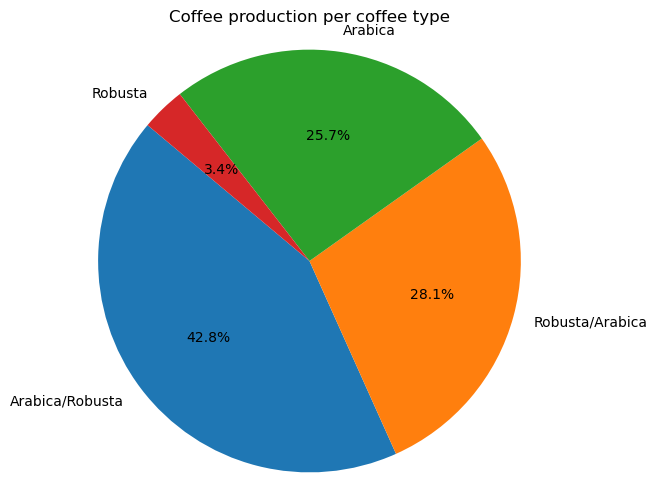

In [301]:
# Extract the values for the pie chart
sizes = production_grouped['Total_production']
labels = production_grouped['Coffee type']

# Plot the pie chart
plt.figure(figsize=(6, 6)) # Adjust the size to your preference
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Coffee production per coffee type')

plt.show()


# Domestic Consumption

In [302]:
dom_cons.head()

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
0,Angola,Robusta/Arabica,1200000,1800000,2100000,1200000,1500000,600000,1200000,2400000,...,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,46500000
1,Bolivia (Plurinational State of),Arabica,1500000,1620000,1650000,1710000,1770000,1830000,1890000,1950000,...,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000,75180000
2,Brazil,Arabica/Robusta,492000000,510000000,534000000,546000000,558000000,606000000,660000000,690000000,...,1183200000,1219800000,1205100000,1219980000,1230480000,1273500000,1319820000,1332000000,1320000000,27824700000
3,Burundi,Arabica/Robusta,120000,96000,102000,114600,120000,120000,120000,120000,...,120000,120000,120000,120000,120000,120000,120000,120000,120000,3412020
4,Ecuador,Arabica/Robusta,21000000,21000000,21000000,21000000,21000000,21000000,18000000,18000000,...,9000000,9000000,9300000,9300000,9300000,9300000,9300000,9300000,8940000,381540000


In [303]:
# Summary statistics
numerical_features = dom_cons.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
html_numerical = create_scrollable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
1990/91,55.0,2.128278e+07,6.810062e+07,0.0,180000.0,2040000.0,12990000.0,4.920000e+08
1991/92,55.0,2.206701e+07,7.032839e+07,0.0,180000.0,3000000.0,16713000.0,5.100000e+08
1992/93,55.0,2.285613e+07,7.363077e+07,0.0,180000.0,3000000.0,16500000.0,5.340000e+08
1993/94,55.0,2.301590e+07,7.511769e+07,0.0,240000.0,2400000.0,17310000.0,5.460000e+08
1994/95,55.0,2.330200e+07,7.679945e+07,0.0,240000.0,3000000.0,16500000.0,5.580000e+08
1995/96,55.0,2.465735e+07,8.321743e+07,0.0,240000.0,3000000.0,17755350.0,6.060000e+08
1996/97,55.0,2.565010e+07,9.039443e+07,0.0,180000.0,3000000.0,17925480.0,6.600000e+08
1997/98,55.0,2.647750e+07,9.438905e+07,0.0,180000.0,3000000.0,18000000.0,6.900000e+08
1998/99,55.0,2.739992e+07,9.995154e+07,0.0,210000.0,3000000.0,18000000.0,7.320000e+08
1999/00,55.0,2.808131e+07,1.040782e+08,0.0,210000.0,3000000.0,15900000.0,7.620000e+08


In [304]:
# find countries with highest domestic consumption (1990-2020)
top_dom_cons = dom_cons[['Country', 'Total_domestic_consumption']].sort_values(by=['Total_domestic_consumption'], ascending=False).head(10)
top_dom_cons.head(10)

,Country,Total_domestic_consumption
2,Brazil,27824700000
5,Indonesia,4920480000
29,Ethiopia,4536540000
41,Mexico,3189660000
18,Philippines,2807280000
23,Colombia,2536776384
52,Venezuela,2386067999
36,India,2093460000
53,Viet Nam,1920928320
48,Thailand,1248600000


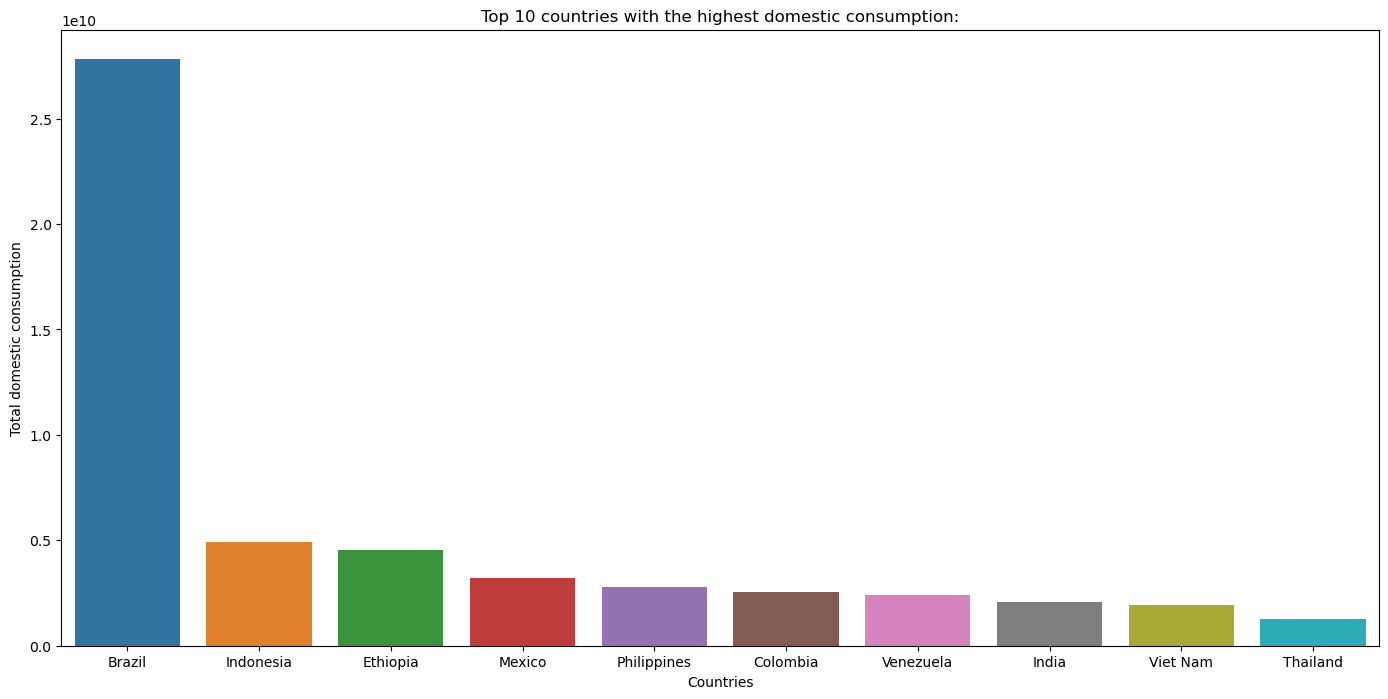

In [305]:
plt.figure(figsize=(17, 8)) # You can adjust the size to your preference
sns.barplot(x='Country', y='Total_domestic_consumption', data=top_dom_cons)

plt.title('Top 10 countries with the highest domestic consumption:')
plt.xlabel('Countries')
plt.ylabel('Total domestic consumption')

plt.show()

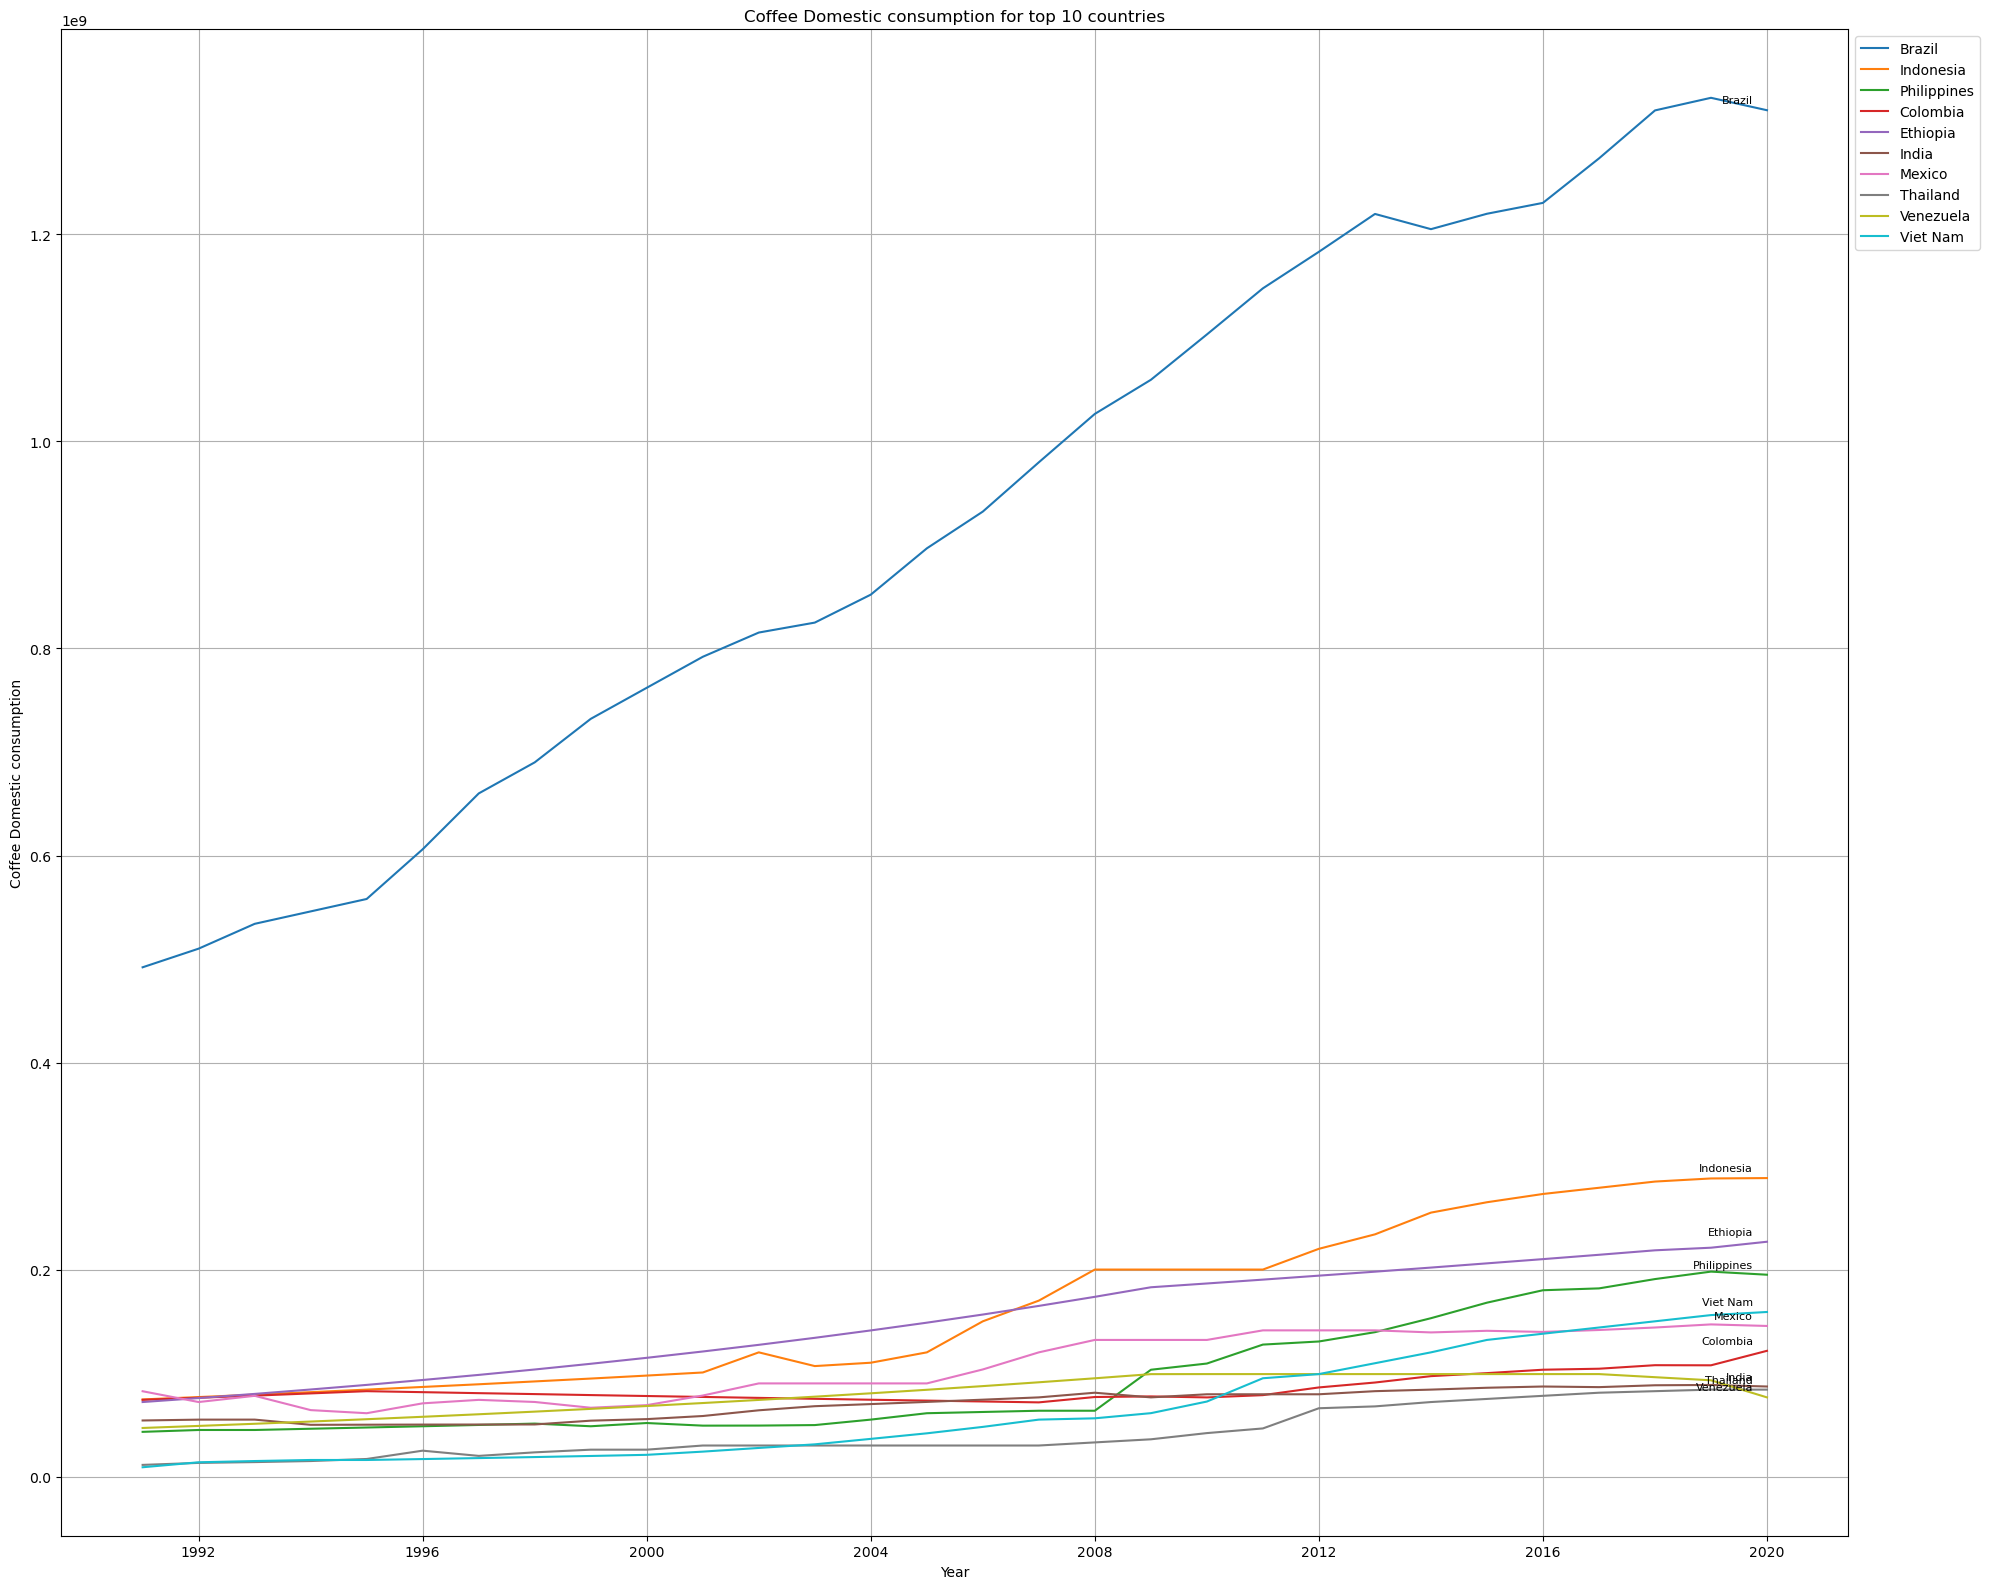

In [306]:
# Melt the DataFrame to convert years into a single 'Year' column
df_melted = pd.melt(dom_cons.iloc[:,:-1], id_vars=['Country', 'Coffee type'], var_name='Year', value_name='Domestic consumption')

# Convert the 'Year' column to datetime
df_melted['Year'] = pd.to_datetime(df_melted['Year'], format='%Y/%y')

# calculate the total production for each country
total_dom_cons = df_melted.groupby('Country')['Domestic consumption'].sum().reset_index()

# top 10 countries by total production
top_10_countries = total_dom_cons.nlargest(10, 'Domestic consumption')['Country']

# subset the df_melted DataFrame to include only the top 10 countries
df_melted_top_10 = df_melted[df_melted['Country'].isin(top_10_countries)]

plt.figure(figsize=(20, 16))
sns.lineplot(x='Year', y='Domestic consumption', hue='Country', data=df_melted_top_10)
plt.xlabel('Year')
plt.ylabel('Coffee Domestic consumption')
plt.title('Coffee Domestic consumption for top 10 countries')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid() 

# Annotate the curves with labels near the last data point of each line
for country, data in df_melted_top_10.groupby('Country'):
    last_data = data.iloc[-1]
    plt.annotate(country, xy=(last_data['Year'], last_data['Domestic consumption']), xytext=(-10, 5),
                 textcoords='offset points', fontsize=8, ha='right')

plt.tight_layout()
plt.show()


In [307]:
# production per coffee type
dom_cons_grouped = dom_cons.groupby(['Coffee type'])

In [308]:
dom_cons_coffee_type = dom_cons_grouped['Total_domestic_consumption'].sum().sort_values(ascending=False).reset_index()

In [309]:
dom_cons_coffee_type.head()

,Coffee type,Total_domestic_consumption
0,Arabica/Robusta,32713048860
1,Robusta/Arabica,13883695680
2,Arabica,13183175423
3,Robusta,1406845140


# Coffee Export

In [310]:
export.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_export
0,Angola,5040000,4260000,4800000,2340000,480000,2460000,3120000,3000000,3240000,...,480000,480000,360000,540000,660000,660000,540000,540000,1380000,43320000
1,Bolivia (Plurinational State of),9360000,4440000,5760000,2820000,5040000,5640000,7380000,6660000,5820000,...,4440000,3780000,3300000,3720000,1800000,1320000,1560000,1320000,1200000,137460000
2,Brazil,1016160000,1270980000,1127460000,1070280000,1036380000,868080000,915060000,1008060000,1088640000,...,2028360000,1712940000,1899060000,-2147483648,-2147483648,2056140000,1855500000,2138220000,-2147483648,33807709056
3,Burundi,35100000,41280000,38760000,25080000,30480000,31680000,13440000,31740000,22440000,...,13080000,23520000,11700000,15120000,13800000,12240000,10140000,12120000,17580000,646200000
4,Cameroon,156660000,105120000,98760000,42300000,32760000,24420000,33840000,82080000,44760000,...,29400000,37320000,16320000,22500000,23400000,16860000,14700000,17220000,15000000,1399920000


In [311]:
# Summary statistics
numerical_features = export.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
html_numerical = create_scrollable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
1990,55.0,8.800800e+07,1.832890e+08,0.000000e+00,4020000.0,15780000.0,1.055700e+08,1.016160e+09
1991,55.0,8.284691e+07,2.019180e+08,0.000000e+00,3960000.0,9300000.0,8.502000e+07,1.270980e+09
1992,55.0,8.541382e+07,2.031566e+08,0.000000e+00,2310000.0,9960000.0,7.971000e+07,1.127460e+09
1993,55.0,8.200036e+07,1.852049e+08,0.000000e+00,2220000.0,13080000.0,7.818000e+07,1.070280e+09
1994,55.0,7.713600e+07,1.719033e+08,0.000000e+00,1860000.0,9180000.0,8.499000e+07,1.036380e+09
1995,55.0,7.404436e+07,1.471032e+08,0.000000e+00,2370000.0,12000000.0,8.970000e+07,8.680800e+08
1996,55.0,8.472982e+07,1.634044e+08,0.000000e+00,1680000.0,9360000.0,1.055100e+08,9.150600e+08
1997,55.0,8.775055e+07,1.761129e+08,0.000000e+00,2220000.0,12180000.0,9.048000e+07,1.008060e+09
1998,55.0,8.753673e+07,1.836647e+08,0.000000e+00,1800000.0,12840000.0,9.099000e+07,1.088640e+09
1999,55.0,9.397091e+07,2.146255e+08,0.000000e+00,2220000.0,18060000.0,9.414000e+07,1.388940e+09


In [312]:
# some values for Brazil are negative -> take the abs-value
for col in export.columns[1:31]:
    mask_negatives = export[col] < 0
    export.loc[mask_negatives, col] *= -1


In [313]:
# Total_export for Brazil is also wrong 
# -> calculate the sum of all yearly values and update Total_export
export[export['Country'] == 'Brazil'].iloc[:,2:31].sum(axis=1)

2    45676450944
dtype: int64

In [314]:
export[export['Country'] == 'Brazil']

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_export
2,Brazil,1016160000,1270980000,1127460000,1070280000,1036380000,868080000,915060000,1008060000,1088640000,...,2028360000,1712940000,1899060000,2147483648,2147483648,2056140000,1855500000,2138220000,2147483648,33807709056


In [315]:
export.at[2, 'Total_export']

33807709056

In [316]:
export.at[2, 'Total_export'] = export[export['Country'] == 'Brazil'].iloc[:,2:31].sum(axis=1)

In [317]:
# find countries with highest Total Production (1990-2020)
top_export = export[['Country', 'Total_export']].sort_values(by=['Total_export'], ascending=False).head(10)
top_export.head(10)

,Country,Total_export
2,Brazil,45676450944
51,Viet Nam,24924480000
6,Colombia,19878480000
25,Indonesia,10607940000
24,India,6933960000
19,Guatemala,6464340000
23,Honduras,5964840000
49,Uganda,5632200000
32,Mexico,5628000000
39,Peru,4903920000


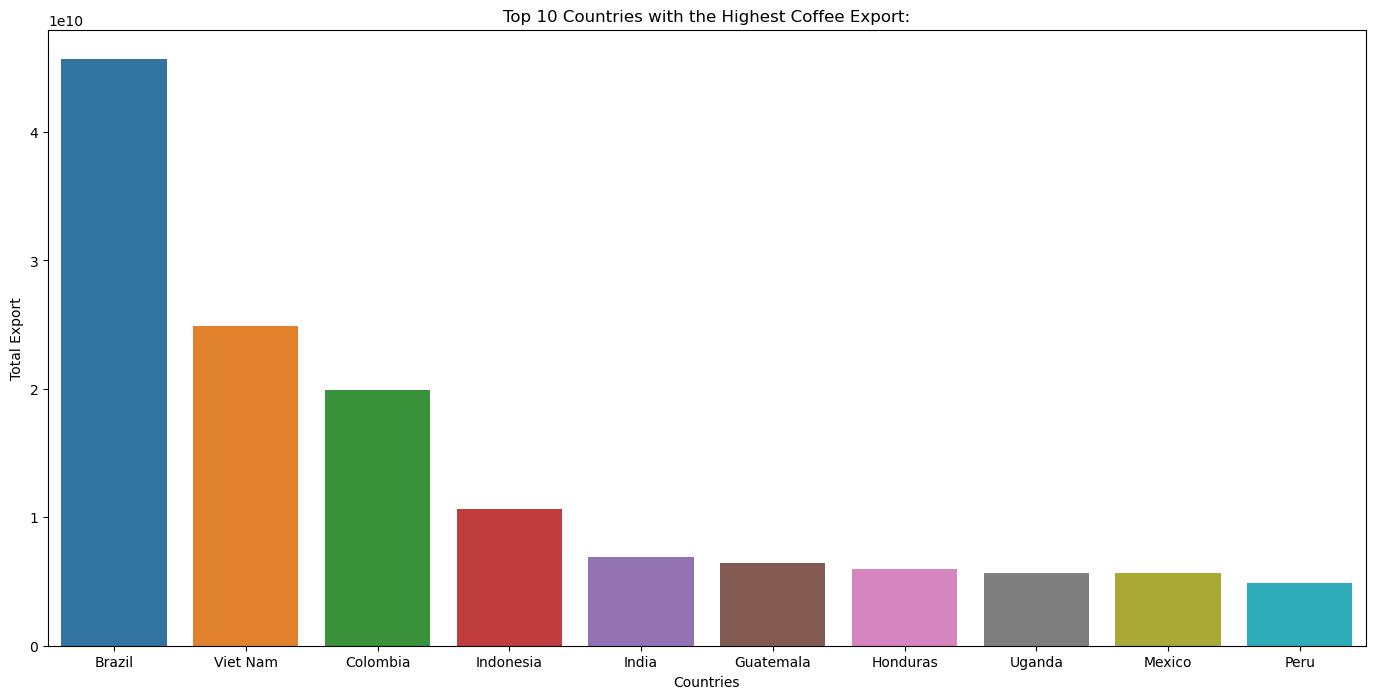

In [318]:
plt.figure(figsize=(17, 8)) # You can adjust the size to your preference
sns.barplot(x='Country', y='Total_export', data=top_export)

plt.title('Top 10 Countries with the Highest Coffee Export:')
plt.xlabel('Countries')
plt.ylabel('Total Export')

plt.show()

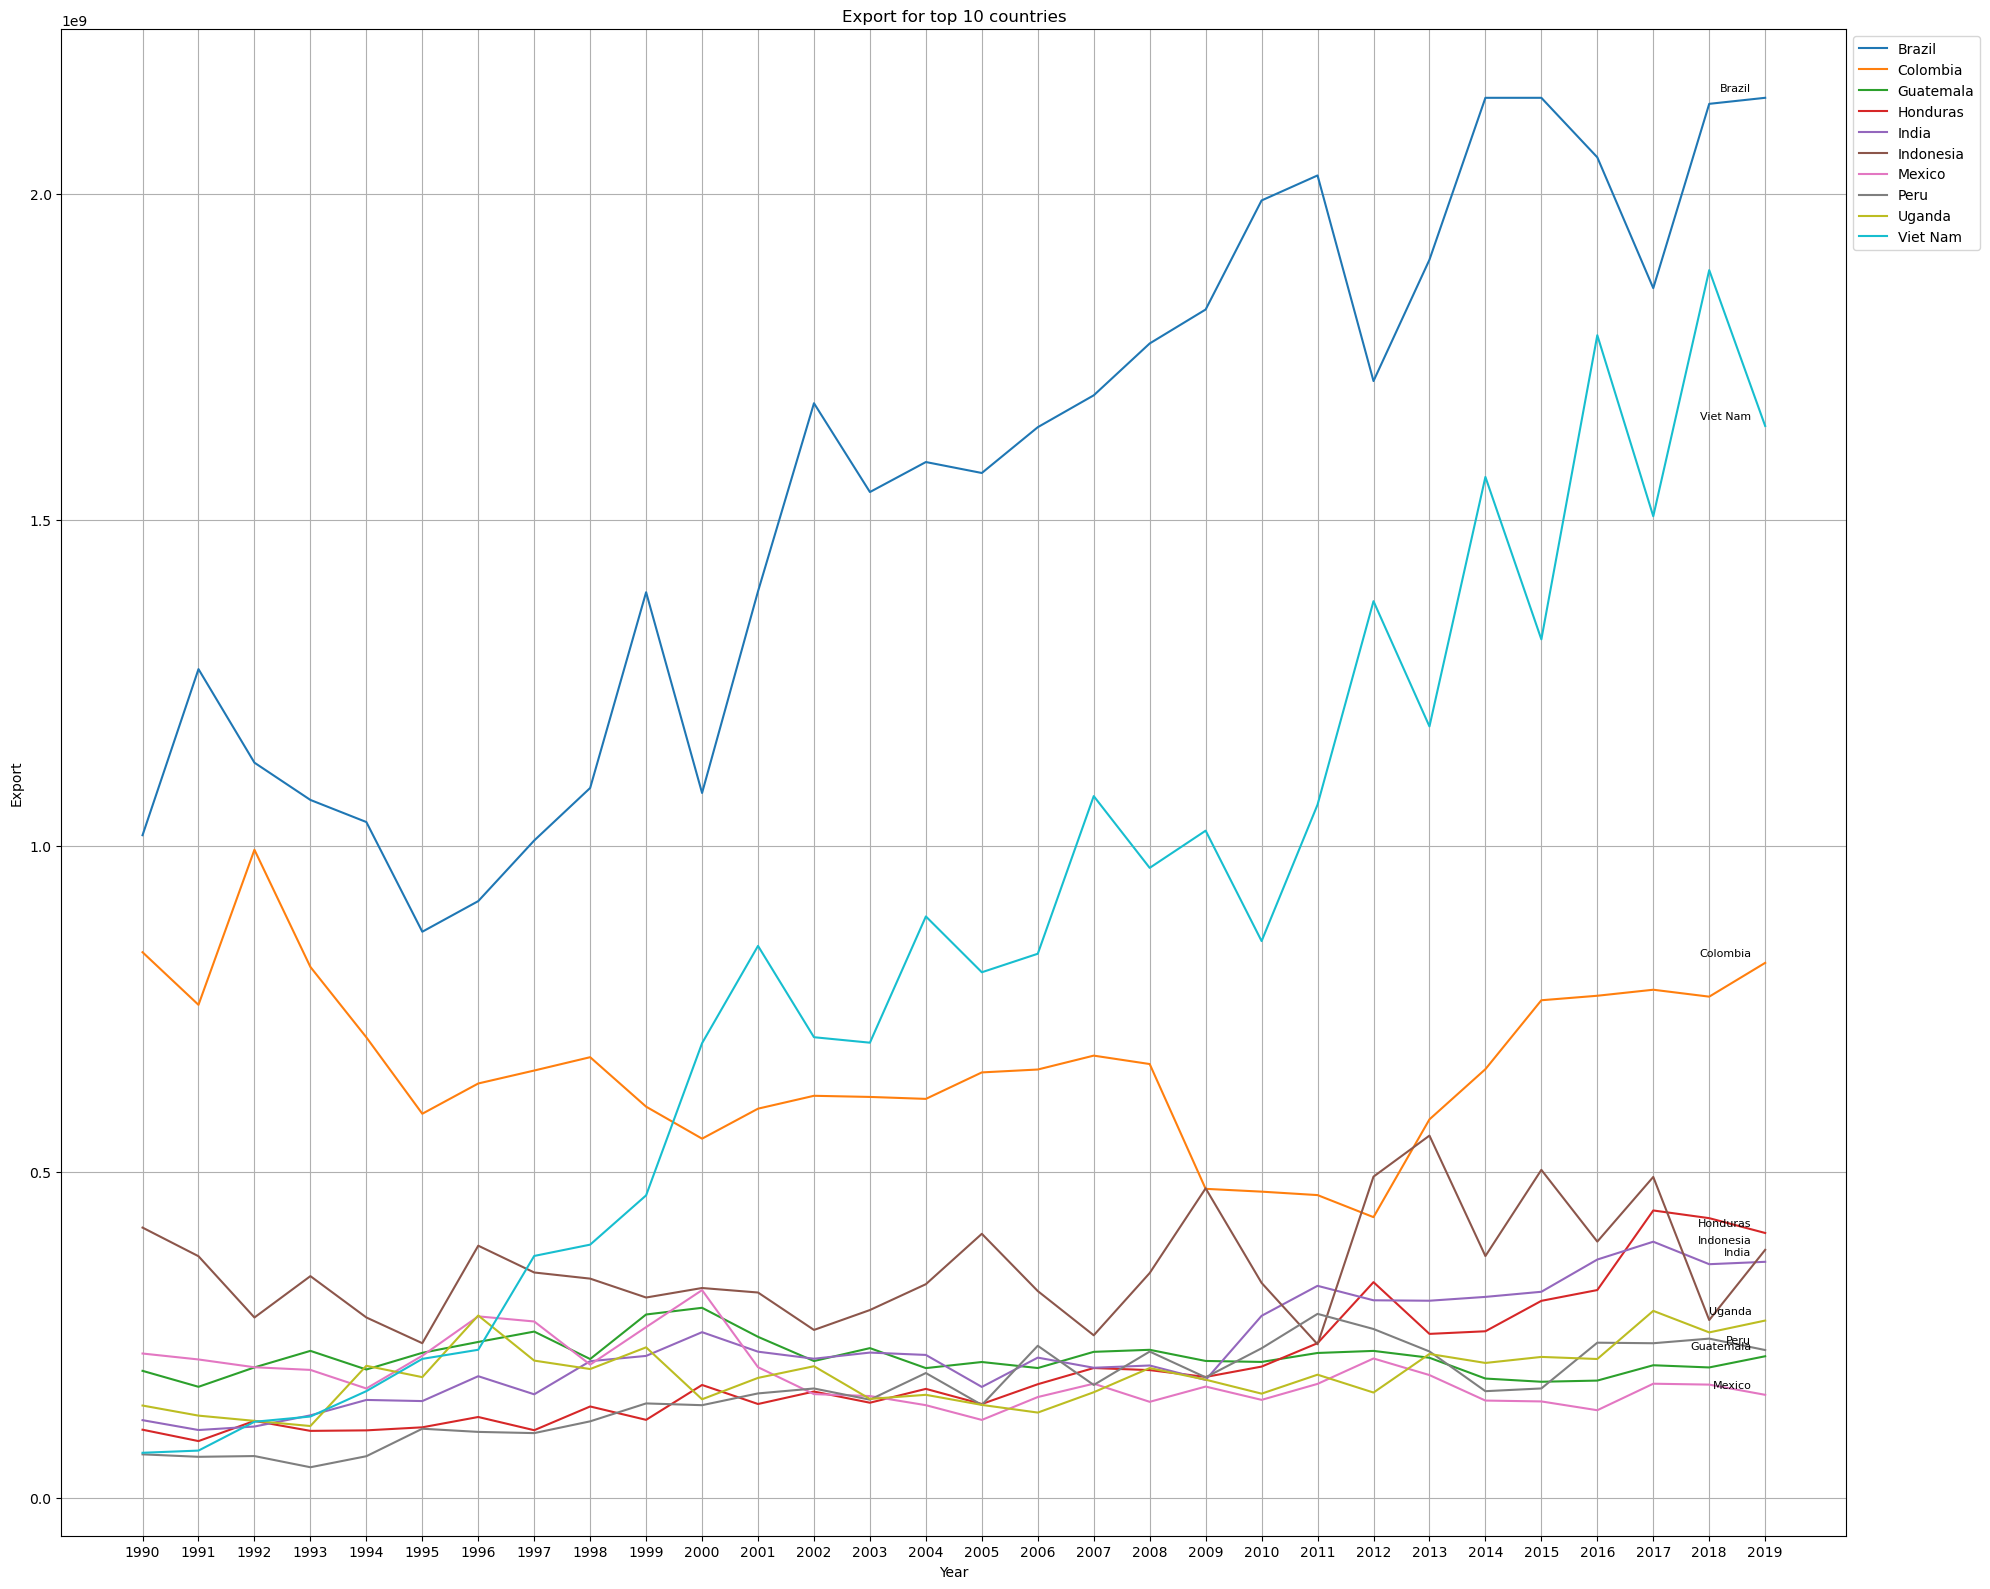

In [319]:
# Melt the DataFrame to convert years into a single 'Year' column
df_melted = pd.melt(export.iloc[:,:-1], id_vars=['Country'], var_name='Year', value_name='Export')

# calculate the total production for each country
total_export = df_melted.groupby('Country')['Export'].sum().reset_index()

# top 10 countries by total production
top_10_countries = total_export.nlargest(10, 'Export')['Country']

# subset the df_melted DataFrame to include only the top 10 countries
df_melted_top_10 = df_melted[df_melted['Country'].isin(top_10_countries)]

plt.figure(figsize=(20, 16))
sns.lineplot(x='Year', y='Export', hue='Country', data=df_melted_top_10)
plt.xlabel('Year')
plt.ylabel('Export')
plt.title('Export for top 10 countries')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid() 

# Annotate the curves with labels near the last data point of each line
for country, data in df_melted_top_10.groupby('Country'):
    last_data = data.iloc[-1]
    plt.annotate(country, xy=(last_data['Year'], last_data['Export']), xytext=(-10, 5),
                 textcoords='offset points', fontsize=8, ha='right')

plt.tight_layout()
plt.show()


# Coffee Import

In [320]:
imports.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_import
0,Austria,112800000,123480000,132360000,110160000,85020000,73860000,72600000,77640000,77580000,...,87120000,93540000,93300000,91500000,90780000,89700000,87600000,85740000,86880000,2765760000
1,Belgium,0,0,0,0,0,0,0,0,0,...,349680000,340080000,330120000,312720000,332040000,363120000,340620000,344520000,371940000,6240540000
2,Belgium/Luxembourg,120900000,104760000,109680000,123780000,135720000,144060000,151560000,152640000,214800000,...,0,0,0,0,0,0,0,0,0,1257900000
3,Bulgaria,16080000,12000000,10920000,23820000,27780000,30900000,16320000,17640000,20520000,...,28920000,33600000,36540000,37260000,40920000,46740000,42420000,44220000,47100000,830700000
4,Croatia,0,0,10080000,9780000,11580000,19200000,19320000,23100000,20340000,...,23460000,23040000,24780000,25200000,26220000,28740000,26340000,26760000,27960000,622080000


In [321]:
# Summary statistics
numerical_features = imports.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
html_numerical = create_scrollable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
1990,35.0,1.270834e+08,2.543488e+08,0.0,630000.0,3.444000e+07,1.168500e+08,1.260420e+09
1991,35.0,1.221943e+08,2.435393e+08,0.0,480000.0,3.150000e+07,1.141200e+08,1.190400e+09
1992,35.0,1.357989e+08,2.690354e+08,0.0,6180000.0,3.618000e+07,1.210200e+08,1.376340e+09
1993,35.0,1.322023e+08,2.424808e+08,0.0,7890000.0,4.008000e+07,1.169700e+08,1.159740e+09
1994,35.0,1.286126e+08,2.178530e+08,0.0,8880000.0,4.626000e+07,1.246500e+08,9.702600e+08
1995,35.0,1.240646e+08,2.188911e+08,0.0,8550000.0,3.798000e+07,1.251600e+08,1.026420e+09
1996,35.0,1.334674e+08,2.415144e+08,0.0,9750000.0,4.458000e+07,1.335000e+08,1.166700e+09
1997,35.0,1.389651e+08,2.500391e+08,0.0,10740000.0,4.362000e+07,1.439100e+08,1.220580e+09
1998,35.0,1.418863e+08,2.548447e+08,0.0,10770000.0,4.572000e+07,1.546500e+08,1.261800e+09
1999,35.0,1.464549e+08,2.715283e+08,0.0,11760000.0,4.740000e+07,1.491000e+08,1.364760e+09


In [322]:
# find countries with highest Total Production (1990-2020)
top_import = imports[['Country', 'Total_import']].sort_values(by=['Total_import'], ascending=False).head(10)
top_import.head(10)

,Country,Total_import
34,United States of America,42507660000
11,Germany,31481400000
15,Italy,13272120000
28,Japan,12422760000
10,France,11972520000
26,Spain,7840620000
33,United Kingdom,6731460000
1,Belgium,6240540000
20,Netherlands,5951400000
30,Russian Federation,5731080000


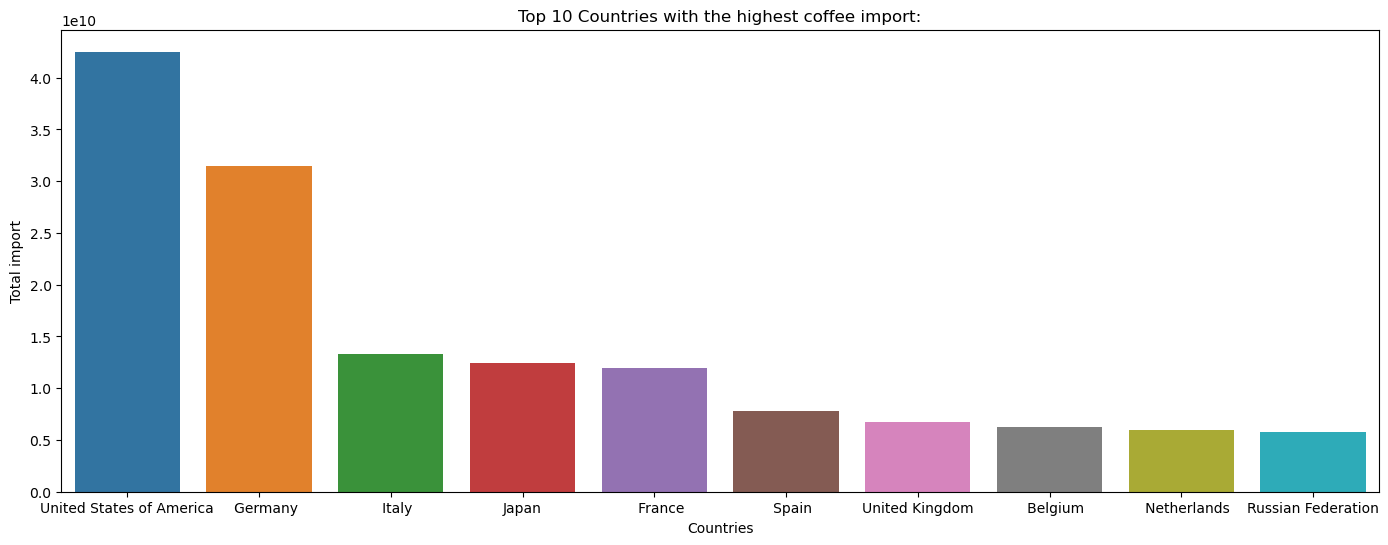

In [323]:
plt.figure(figsize=(17, 6)) # You can adjust the size to your preference
sns.barplot(x='Country', y='Total_import', data=top_import)

plt.title('Top 10 Countries with the highest coffee import:')
plt.xlabel('Countries')
plt.ylabel('Total import')

plt.show()

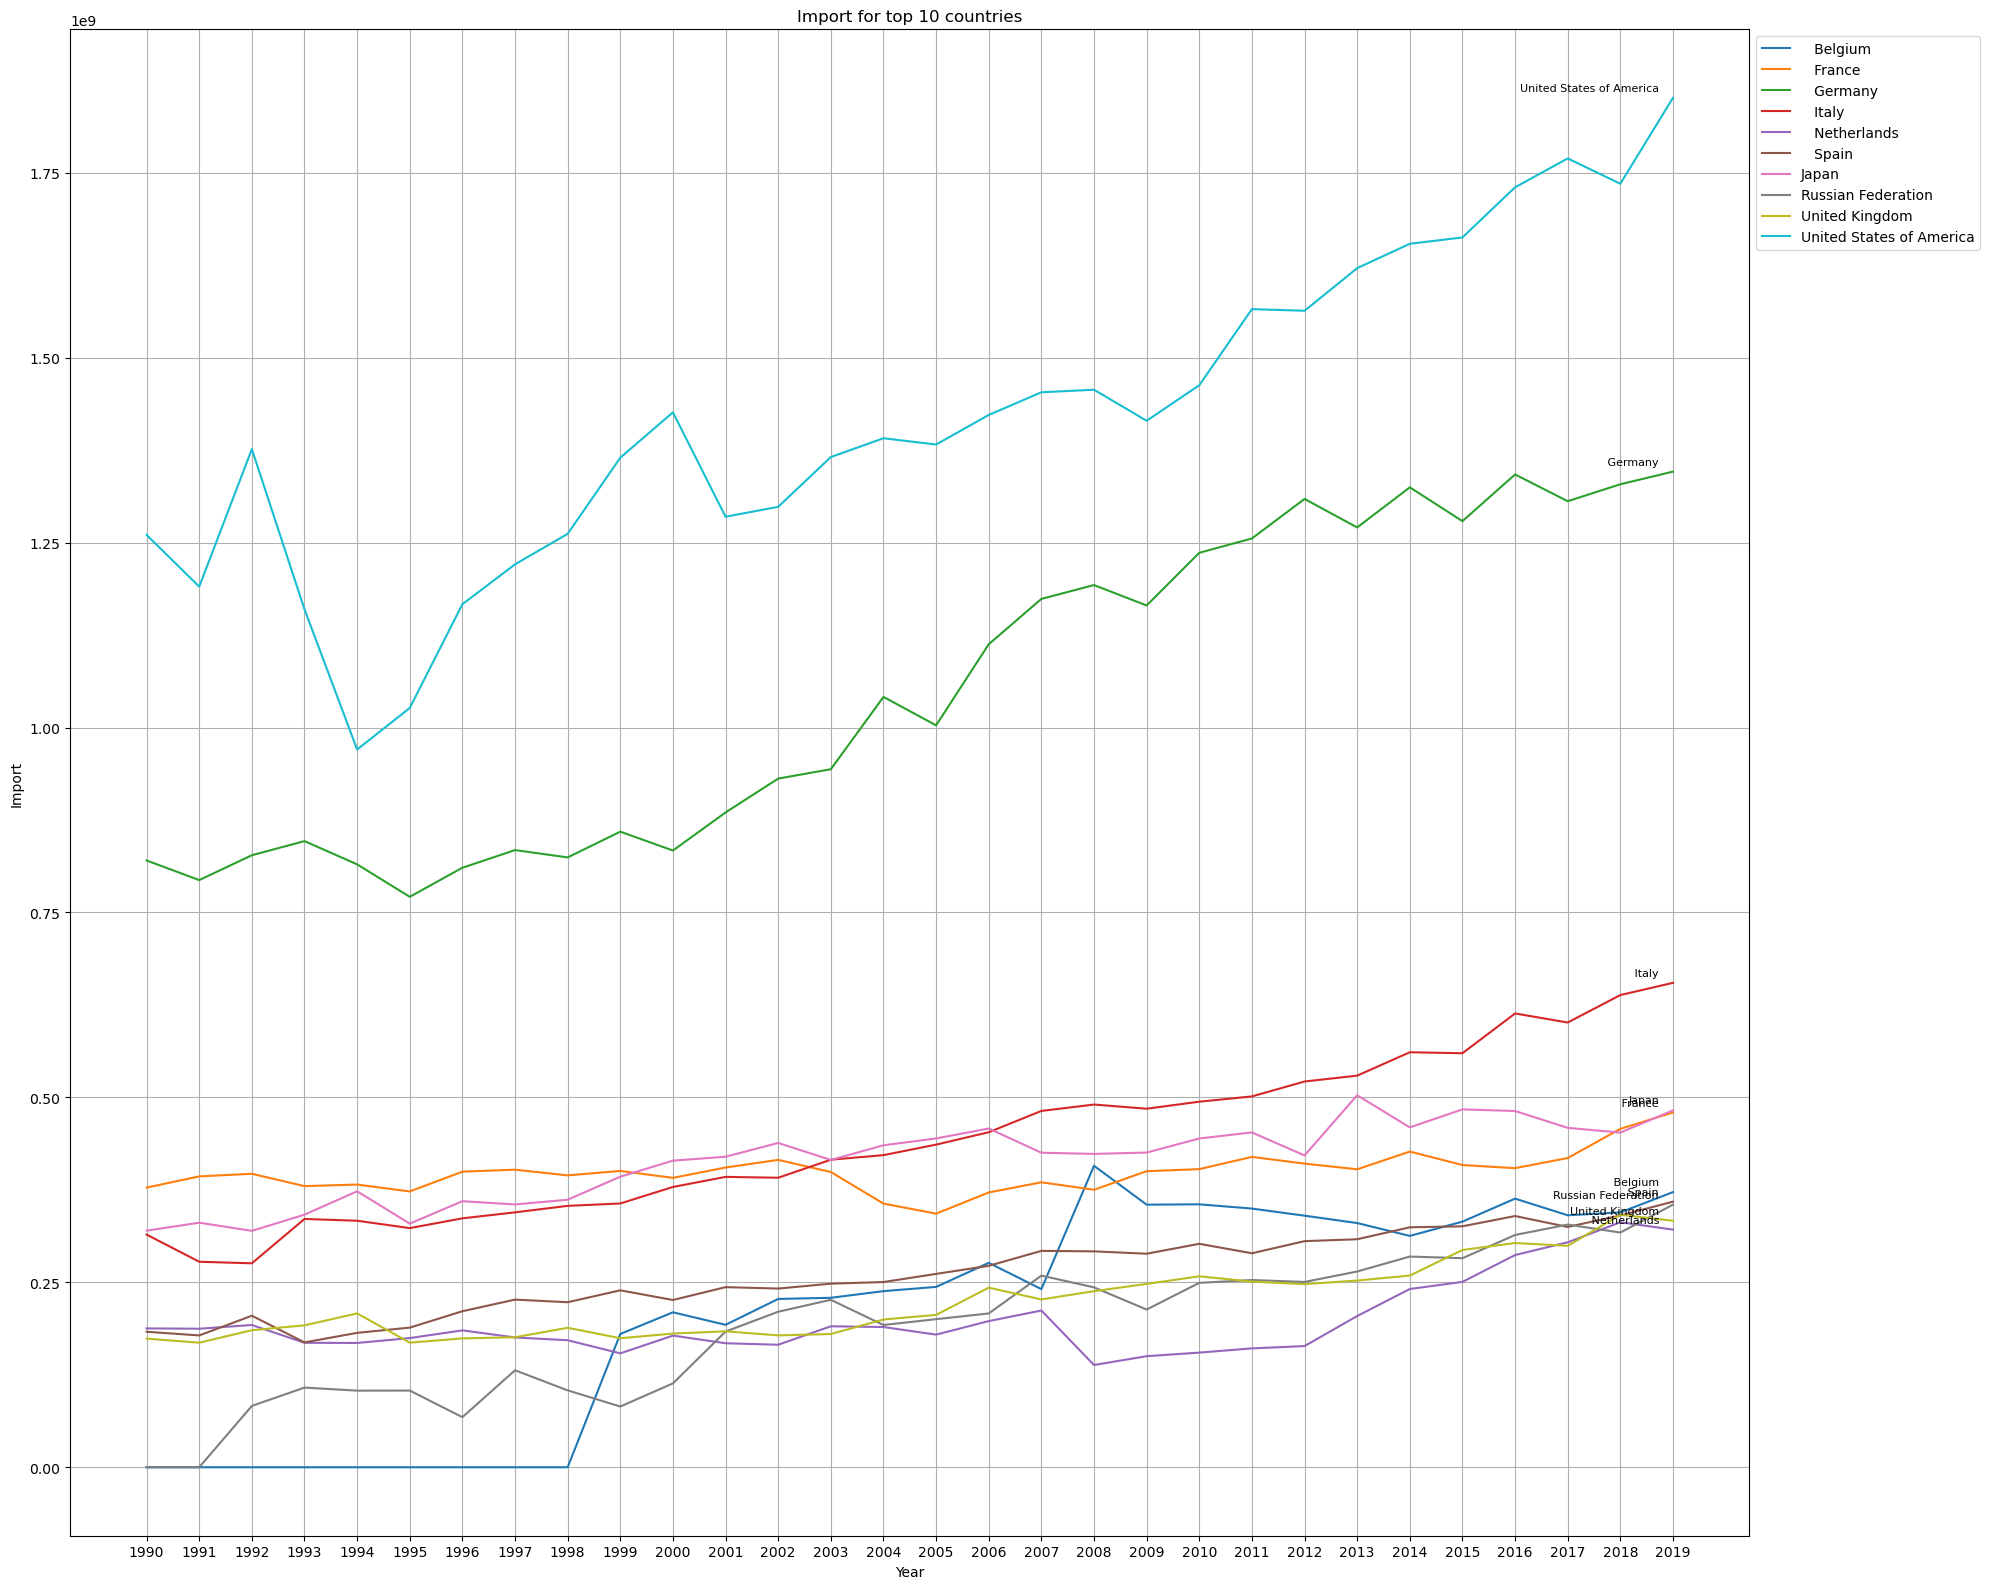

In [324]:
# Melt the DataFrame to convert years into a single 'Year' column
df_melted = pd.melt(imports.iloc[:,:-1], id_vars=['Country'], var_name='Year', value_name='Import')

# calculate the total production for each country
total_export = df_melted.groupby('Country')['Import'].sum().reset_index()

# top 10 countries by total production
top_10_countries = total_export.nlargest(10, 'Import')['Country']

# subset the df_melted DataFrame to include only the top 10 countries
df_melted_top_10 = df_melted[df_melted['Country'].isin(top_10_countries)]

plt.figure(figsize=(20, 16))
sns.lineplot(x='Year', y='Import', hue='Country', data=df_melted_top_10)
plt.xlabel('Year')
plt.ylabel('Import')
plt.title('Import for top 10 countries')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid() 

# Annotate the curves with labels near the last data point of each line
for country, data in df_melted_top_10.groupby('Country'):
    last_data = data.iloc[-1]
    plt.annotate(country, xy=(last_data['Year'], last_data['Import']), xytext=(-10, 5),
                 textcoords='offset points', fontsize=8, ha='right')

plt.tight_layout()
plt.show()

# Coffee Importers Consumption

In [325]:
imp_cons.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_import_consumption
0,Austria,80400000,78120000,72720000,80100000,65160000,60720000,64560000,65220000,66300000,...,67020000,76140000,74940000,68100000,68160000,71580000,69720000,70320000,70380000,1904520000
1,Belgium,0,0,0,0,0,0,0,0,0,...,56040000,54900000,74700000,75540000,64440000,90120000,78000000,81900000,71100000,1460520000
2,Belgium/Luxembourg,67440000,42480000,41760000,47340000,57480000,64380000,62340000,53160000,78540000,...,0,0,0,0,0,0,0,0,0,514920000
3,Bulgaria,6120000,1020000,10500000,19620000,21180000,23580000,14760000,16500000,19440000,...,21600000,22560000,25140000,22560000,24360000,27120000,24900000,25560000,25380000,625080000
4,Croatia,0,0,8100000,7920000,9840000,17280000,18240000,21660000,19200000,...,22020000,21600000,23220000,22080000,22500000,22800000,21660000,21600000,22860000,564180000


In [326]:
# Summary statistics
numerical_features = imp_cons.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
html_numerical = create_scrollable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
1990,35.0,1.016966e+08,2.039203e+08,0.0,600000.0,3.444000e+07,9.087000e+07,1.097880e+09
1991,35.0,1.095960e+08,2.289454e+08,0.0,390000.0,2.322000e+07,8.718000e+07,1.119660e+09
1992,35.0,1.112211e+08,2.111271e+08,0.0,6060000.0,3.606000e+07,9.852000e+07,1.097400e+09
1993,35.0,1.177817e+08,2.269096e+08,0.0,7170000.0,3.342000e+07,1.023900e+08,1.153020e+09
1994,35.0,1.092720e+08,1.983025e+08,0.0,8670000.0,4.344000e+07,1.036200e+08,1.039560e+09
1995,35.0,1.124451e+08,2.115204e+08,0.0,8310000.0,3.792000e+07,9.861000e+07,1.041780e+09
1996,35.0,1.144783e+08,2.138806e+08,0.0,9240000.0,4.278000e+07,9.159000e+07,1.083540e+09
1997,35.0,1.140394e+08,2.082537e+08,0.0,9780000.0,4.050000e+07,1.146900e+08,1.067700e+09
1998,35.0,1.164463e+08,2.156537e+08,0.0,9270000.0,4.176000e+07,1.082400e+08,1.116240e+09
1999,35.0,1.167429e+08,2.219361e+08,0.0,10680000.0,4.422000e+07,8.469000e+07,1.161540e+09


In [327]:
# find countries with highest total import consumption (1990-2020)
top_imp_cons = imp_cons[['Country', 'Total_import_consumption']].sort_values(by=['Total_import_consumption'], ascending=False).head(10)
top_imp_cons.head(10)

,Country,Total_import_consumption
34,United States of America,37816800000
11,Germany,16767720000
28,Japan,12187140000
10,France,9904860000
15,Italy,9578940000
26,Spain,5530260000
30,Russian Federation,5121240000
33,United Kingdom,5002620000
20,Netherlands,3477180000
21,Poland,3289740000


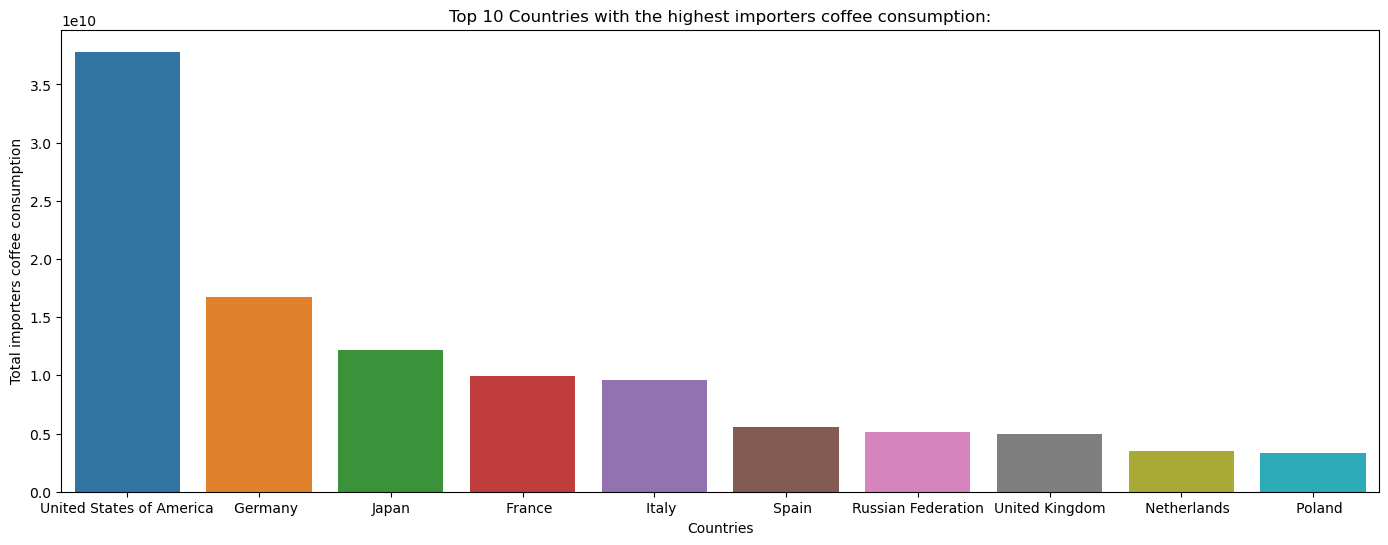

In [328]:
plt.figure(figsize=(17, 6)) # You can adjust the size to your preference
sns.barplot(x='Country', y='Total_import_consumption', data=top_imp_cons)

plt.title('Top 10 Countries with the highest importers coffee consumption:')
plt.xlabel('Countries')
plt.ylabel('Total importers coffee consumption')

plt.show()

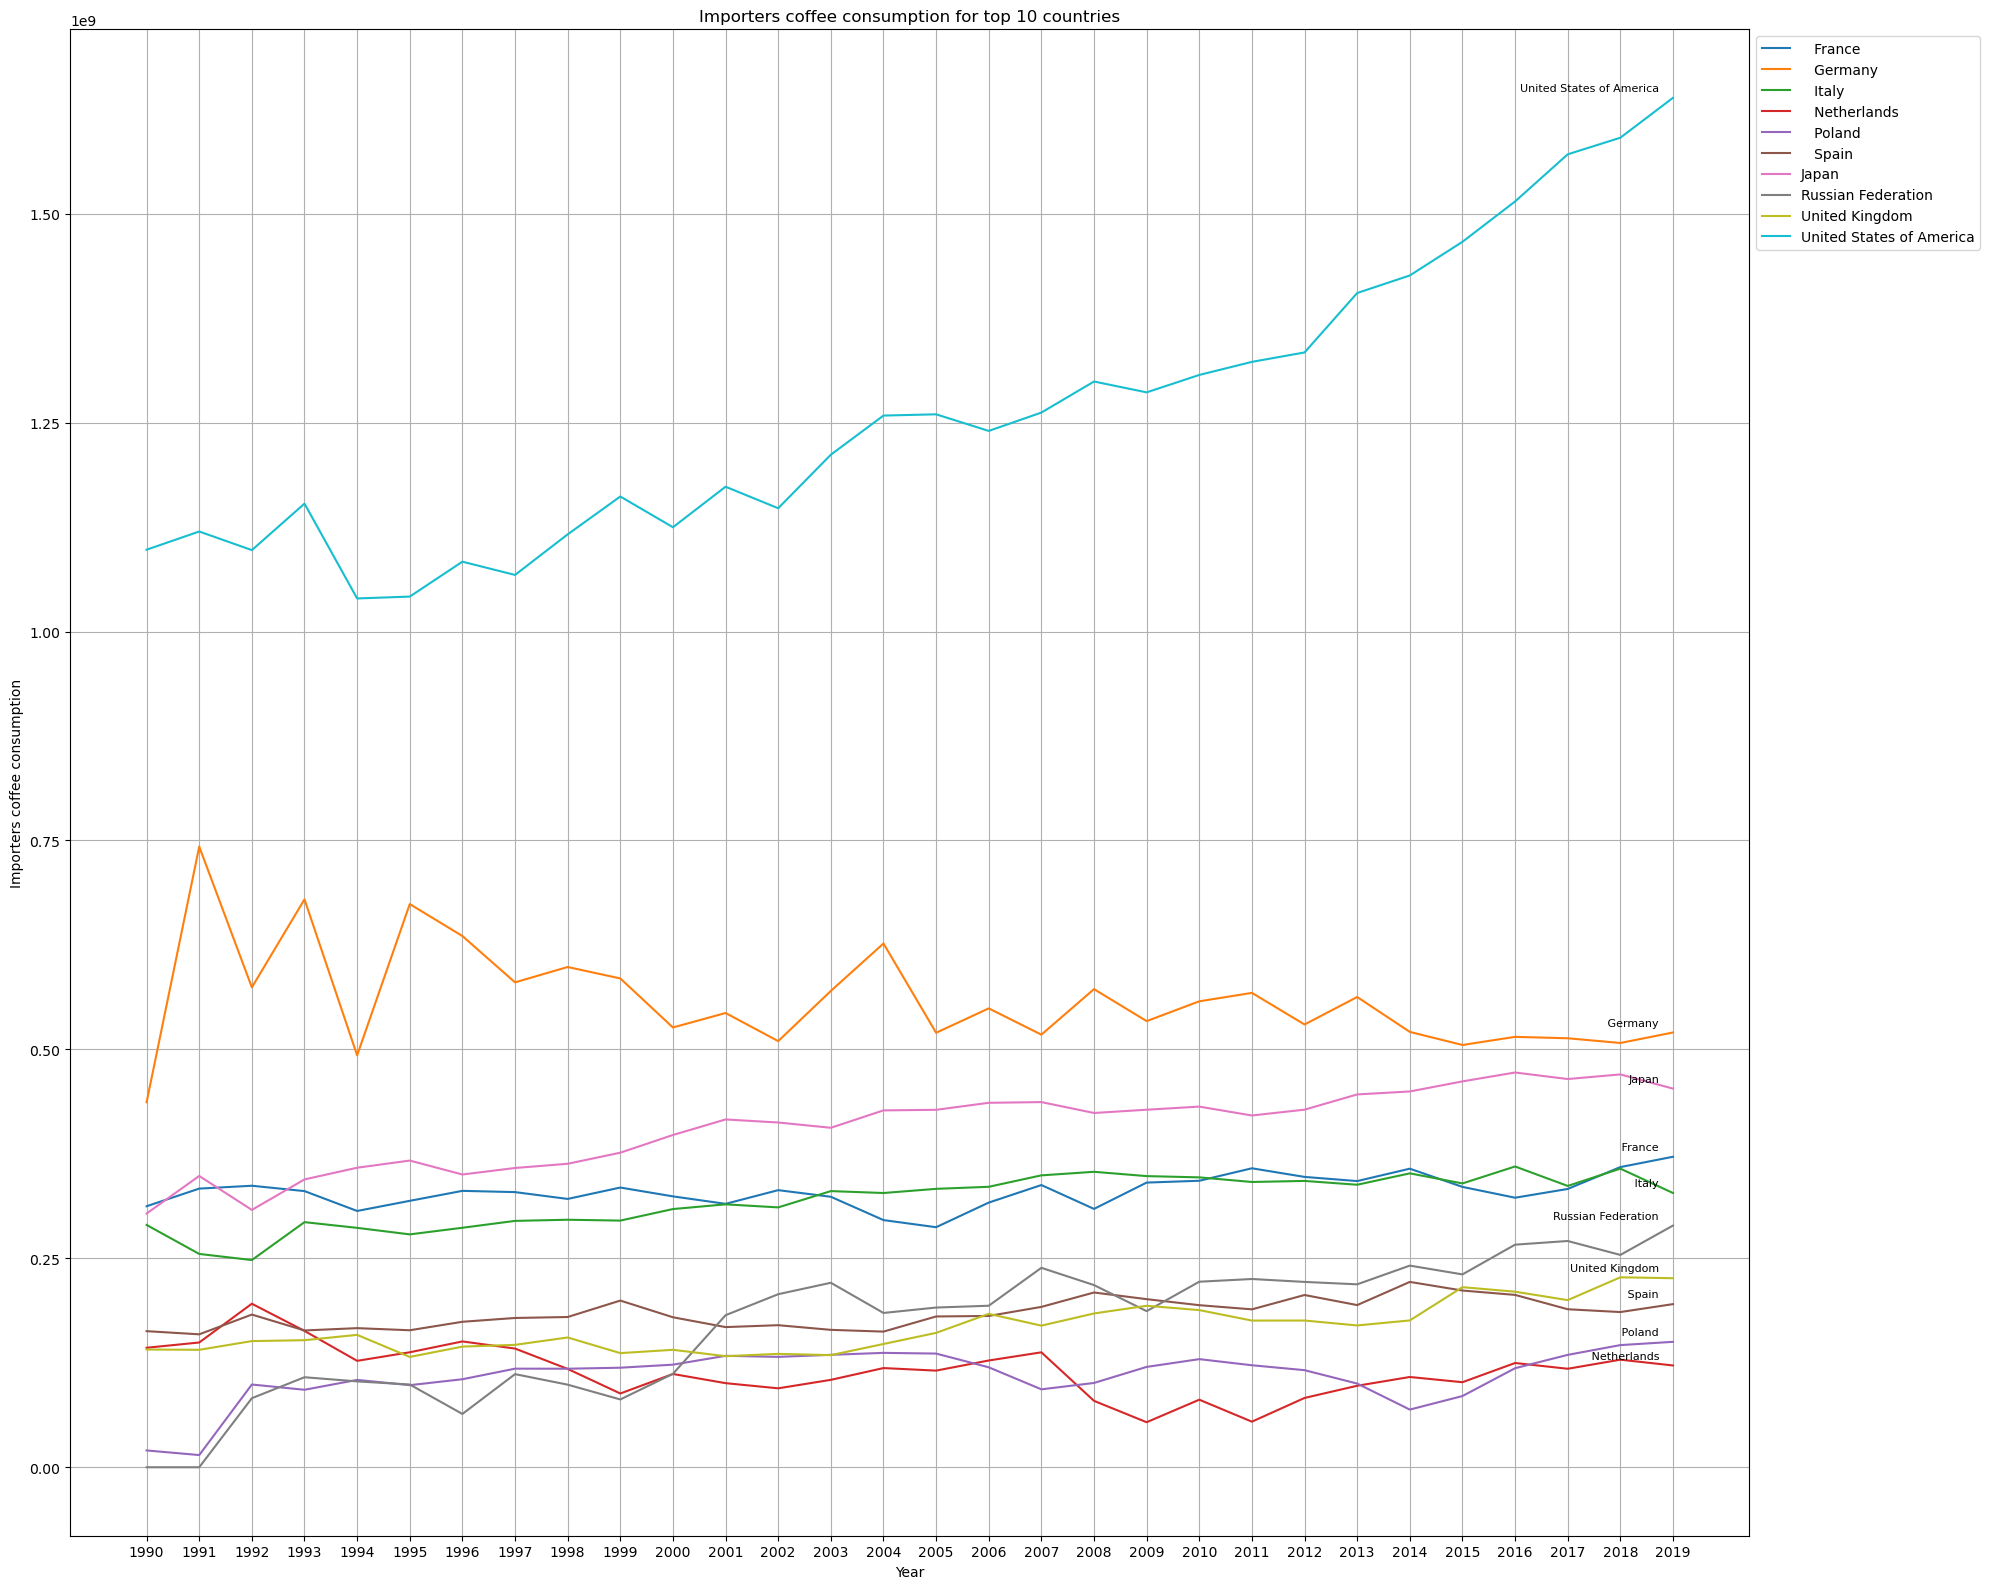

In [329]:
# Melt the DataFrame to convert years into a single 'Year' column
df_melted = pd.melt(imp_cons.iloc[:,:-1], id_vars=['Country'], var_name='Year', value_name='Importers coffee consumption')

# calculate the total production for each country
total_export = df_melted.groupby('Country')['Importers coffee consumption'].sum().reset_index()

# top 10 countries by total production
top_10_countries = total_export.nlargest(10, 'Importers coffee consumption')['Country']

# subset the df_melted DataFrame to include only the top 10 countries
df_melted_top_10 = df_melted[df_melted['Country'].isin(top_10_countries)]

plt.figure(figsize=(20, 16))
sns.lineplot(x='Year', y='Importers coffee consumption', hue='Country', data=df_melted_top_10)
plt.xlabel('Year')
plt.ylabel('Importers coffee consumption')
plt.title('Importers coffee consumption for top 10 countries')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid() 

# Annotate the curves with labels near the last data point of each line
for country, data in df_melted_top_10.groupby('Country'):
    last_data = data.iloc[-1]
    plt.annotate(country, xy=(last_data['Year'], last_data['Importers coffee consumption']), xytext=(-10, 5),
                 textcoords='offset points', fontsize=8, ha='right')

plt.tight_layout()
plt.show()

# Insights from the coffee data:

- Brazil produces the most coffee. Vietnam comes in second, with strong growth over the past 30 years.
- Most of the coffee produced is of the Arabica/Robusta type (about 43%).
- Brazil has the highest domestic consumption.
- Brazil exports the most coffee. Vietnam is second, also with strong growth over the past 30 years.
- The USA imports the most coffee. Germany comes in second.
- The USA consumes the most coffee. Here, too, Germany is second. However, Germany consumes only just under half of the imported coffee. Germany exports the rest to other countries.